# <font color='blue'>COMP41680 Assignment 1: Data Collection & Preparation</font>





## Shivansh Bhandari (16204820)

In [1]:
import csv
import pandas as pd
import json
import urllib.request

## <font color="blue"> Task-1 Choose one or more open web APIs as your source of data.</font>

A Single API was chosen for the assignment which is provided by www.seismic.com.

SEISMI provide REST API with JSON output for earthquake data that is present in Seismi.

The API can be accesed using http://www.seismi.org/api, different arguments can be added and they would complete the request accordingly.

Example query:

http://www.seismi.org/api/eqs/2011/03?min_magnitude=6

This returns most recent earthquakes that are bigger than 6 and that happened in March 2011.

There is a limit on the amount of data which the API return on request, By default, the limit is 400, but it can be increased 900 using the limit keyword in the request. Example: http://www.seismi.org/api/eqs/2011/03?limit=900

Being a limit on the data returned in a single request restricted me to request the data of a year in a single go, that is why the data of each month is requested and stored in a csv and limit is set at maximum i.e. 900.


## <font color="blue"> Task-2&3 Collect data from your chosen API(s) & Parse the collected data, and store it in an appropriate file format. </font>


The following three functions were written to collect the data from the chosen API.

Since, the API only provided a limited data on each call. The request was designed such that all the data of a year was collected.

The functions that perform the function are as follows and are thoroughly commented.

In [2]:
#Function to request the API and collect the data in JSON format
def collect_data(url,data_csv):
    # A try-except block to handle any exception while requesting the API 
    try:
        # URL is used to request the API
        data_response = urllib.request.urlopen(url)
    except:
        print("URL unreachable")
    # Read and decode the response from the API    
    data = data_response.read().decode()
    # Load the received JSON data
    raw_data=json.loads(data)
    write_csv(raw_data,data_csv)
#Function that generates the URL to be requested
def data_url(limit):
    #Initialize month with 1
    month=1
    #Open the CSV in which the collected data would be written
    data_csv=open('earthquake_data.csv','w')
    #A loop to iterate over all months beginning at Jan is needed, the API needs the month in 0x format,
    # therefore, months 1-9 need to have a 0 added to the front and others can be sued as they are
    while month <= 12: 
        if month <10: 
            month = "0" + str(month)
        else:
            month = str(month)
        #month needs to be a string to avoid invalid token errors for ints as the 
        #API needs a leading 0 for single digit months
        url="http://www.seismi.org/api/eqs/2012/"+month+"?limit="+str(limit)
        # Call the function Collect_data
        collect_data(url,data_csv)
        #Increment Month to generate the next request
        month=int(month)+1
    data_csv.close()
# Function to write the collected JSON data into CSV.    
def write_csv(raw_data,data_csv):
    # Where the JSON starts from earthquakes
    earthquake_data=raw_data["earthquakes"]
    csvwriter=csv.writer(data_csv)
    global header_written
    for earthquakes in earthquake_data:
        if header_written==False:
            # To write the headings of the columns
            header=earthquakes.keys()
            csvwriter.writerow(header)
            header_written=True
        # To write the values in each column    
        csvwriter.writerow(earthquakes.values())
    

# A boolean variable to handle the headings are written only once
header_written = False
# Assign the limit value to used in the URL to be requested
limit=900

data_url(limit) 
print("Data Collection Complete")

Data Collection Complete


## <font color="blue"> Task-4 Load and represent the data using an appropriate data structure and Apply any pre-processing steps. </font>

The data Saved in CSV can be directly represented as dataframe using pandas as shown below:




In [3]:
# Read the data from the earthquake_data.csv
df=pd.read_csv("earthquake_data.csv")

# Show the first 10 rows of the dataframe
df[0:10]

,timedate,lon,magnitude,region,lat,src,depth,eqid
0,2012-01-31 19:58:02,167.1942,5.1,Vanuatu,-14.2837,us,172.5,c0007ujt
1,2012-01-31 19:35:24,141.5860,4.8,"near the east coast of Honshu, Japan",37.1985,us,42.2,c0007ujf
2,2012-01-31 18:25:11,149.8907,4.9,"New Britain region, Papua New Guinea",-6.3088,us,43.3,c0007uie
3,2012-01-31 14:52:48,-72.9788,4.4,Colombia,5.0918,us,57.0,2012wkaq
4,2012-01-31 14:36:20,-3.1843,4.4,Spain,37.5724,us,5.0,2012wkam
5,2012-01-31 08:48:06,-93.2371,4.4,"offshore Chiapas, Mexico",14.7620,us,51.6,c0007ubw
6,2012-01-31 07:26:11,-179.4848,4.8,Fiji region,-21.9943,us,596.0,c0007uaw
7,2012-01-31 03:40:30,126.8771,4.8,"Kepulauan Talaud, Indonesia",3.9014,us,52.8,c0007u8t
8,2012-01-31 03:40:30,126.8771,4.8,"Kepulauan Talaud, Indonesia",3.9014,us,52.8,c0007u8t
9,2012-01-30 19:56:07,-179.8815,4.8,south of the Fiji Islands,-25.0558,us,483.2,c0007tz7


In [4]:
# Count the number of coloumns of a particular datatype 
df.dtypes.value_counts()

float64    4
object     4
dtype: int64

There is no strings, this means there's no possiblity of values like "Not avialable" or "NaN".

In [5]:
# To Count the number of rows.
df.count()

timedate     6544
lon          6544
magnitude    6544
region       6544
lat          6544
src          6544
depth        6544
eqid         6544
dtype: int64

In [6]:
# The following function returns whether there is a duplicate value for a particular row or not.
# If, there is any dulpicate row it'll, return True else, False.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8        True
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22      False
23       True
24      False
25      False
26       True
27      False
28       True
29      False
        ...  
6514    False
6515    False
6516    False
6517     True
6518    False
6519    False
6520    False
6521    False
6522    False
6523    False
6524    False
6525    False
6526    False
6527    False
6528     True
6529    False
6530    False
6531    False
6532    False
6533     True
6534    False
6535    False
6536    False
6537    False
6538     True
6539    False
6540    False
6541    False
6542     True
6543    False
dtype: bool

It can be inferenced from the above output that there are many duplicate rows present in the table which should be removed in order to clean the data and make it suitable for analysis.

In [7]:
# Delete all the duplicate values from the data frame
new_df=df.drop_duplicates()

In [8]:
#Count the number of coloumns of a particular datatype 
new_df.count()

timedate     5840
lon          5840
magnitude    5840
region       5840
lat          5840
src          5840
depth        5840
eqid         5840
dtype: int64

Approximately 700 duplicate rows were deleted from the data

In [9]:
# Check if there is any null value in any column
new_df.isnull().sum()

timedate     0
lon          0
magnitude    0
region       0
lat          0
src          0
depth        0
eqid         0
dtype: int64

Since, the sum is 0 for every column, there are no null values in any column.

In [10]:
# default='warn', suppress warning regarding A value is trying to be set on a copy of a slice from a DataFrame.
pd.options.mode.chained_assignment = None
# Convert the timedate column of data to datetime data type.
new_df['timedate']=pd.to_datetime(new_df['timedate'])
# Sort the values according the dates
processed_df=new_df.sort_values(by=['timedate'])

In [11]:
# Count the number of columns of a particular datatype 
processed_df.dtypes.value_counts()

float64           4
object            3
datetime64[ns]    1
dtype: int64

The time date column is sucessfully converted into Datetime data type.

In [12]:
processed_df[0:10]

,timedate,lon,magnitude,region,lat,src,depth,eqid
495,2012-01-01 00:30:06,143.6314,5.1,south of the Mariana Islands,11.9591,us,18.1,c0007fag
494,2012-01-01 00:50:09,166.2085,5.2,Santa Cruz Islands,-11.4036,us,77.6,c0007fac
493,2012-01-01 02:35:19,91.8052,4.6,"Tripura, India region",23.4421,us,15.2,2012vfag
492,2012-01-01 02:40:36,-73.1100,4.0,northern Colombia,6.6774,us,158.1,2012vfai
491,2012-01-01 04:56:41,-149.1724,5.1,Pacific-Antarctic Ridge,-58.3105,us,10.0,c0007fbc
490,2012-01-01 05:19:39,92.0148,4.6,"Andaman Islands, India region",10.7617,us,31.8,c0007fbf
489,2012-01-01 05:27:54,138.1550,6.8,"Izu Islands, Japan region",31.4160,us,348.5,c0007fbh
488,2012-01-01 06:11:42,158.8722,4.7,near the east coast of the Kamchatka Peninsula...,51.0000,us,43.6,c0007fc8
487,2012-01-01 07:40:27,-90.4716,4.3,offshore Guatemala,13.7650,us,71.5,c0007fcx
486,2012-01-01 08:31:26,141.3609,4.5,"near the east coast of Honshu, Japan",37.8278,us,43.1,c0007fdj


First 10 rows of the fully pre processed data.

In [13]:
# A data frame containing only 2 columns i.e. magnitude and depth.
depth_magnitude_df=processed_df[["depth","magnitude"]]

# Describe the dataframe i.e. returns the count, max, min etc in the column.
depth_magnitude_df.describe()

,depth,magnitude
count,5840.000000,5840.000000
mean,73.982808,4.763116
std,114.282564,0.460343
min,0.000000,4.000000
25%,14.000000,4.500000
50%,35.100000,4.700000
75%,73.000000,5.000000
max,648.200000,8.600000


## <font color="blue"> Task-5 Analyse and summarise the cleaned dataset </font>

The Following graphs are used to analyze the data.

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("seaborn-colorblind")

###  Histogram Using Matplotlib 

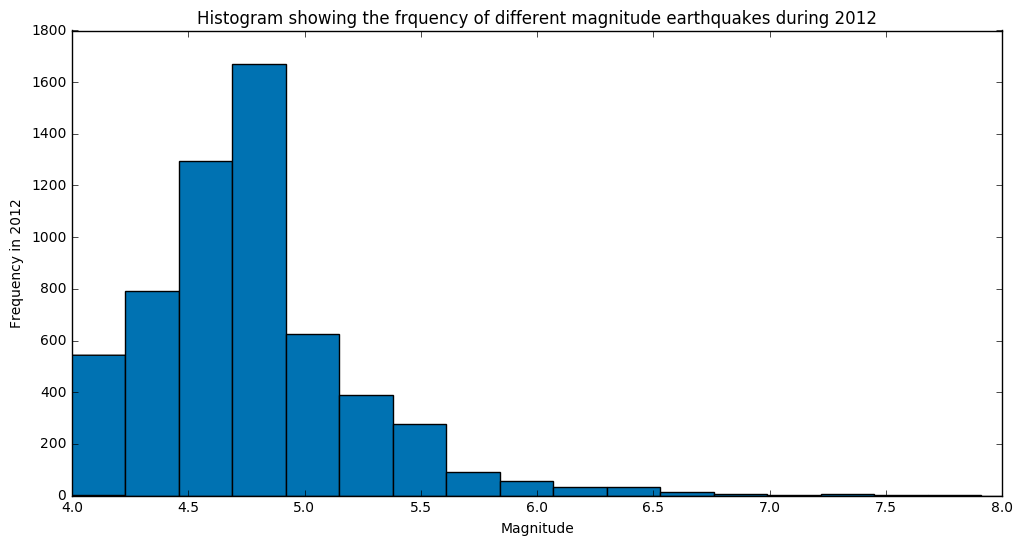

In [15]:
plt.figure()
# plot the histogram and divide the data into 20 bins
processed_df["magnitude"].plot.hist(figsize=(12,6),bins=20)
# set the title of the graph
plt.title("Histogram showing the frquency of different magnitude earthquakes during 2012")
# Set the label of X-Axis
plt.xlabel("Magnitude")
# Set the label of y-Axis
plt.ylabel("Frequency in 2012")
# Set the limit of X-Axis
plt.xlim([4.0,8.0])
plt.show()

The above graph shows the frequency of different magnitude earthquakes during the year 2012 all around the world. The frquency is maximum in the magnitude of range 4.5 to 5.

### Scatter Plot Using Matplotlib

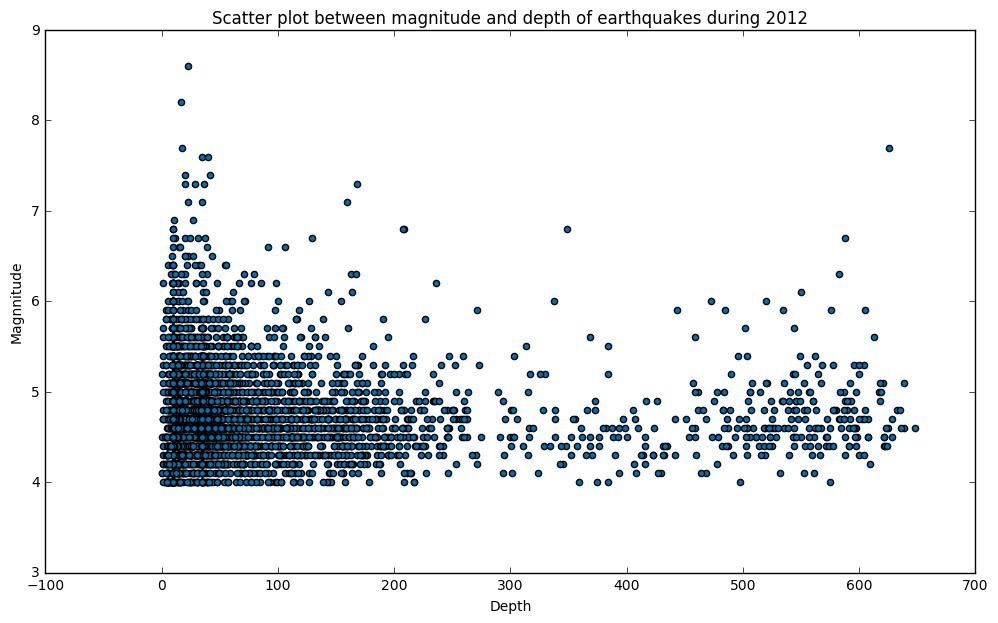

In [16]:
# To plot the scatter plot with X-axis representing depth and y-axis represeting magnitude. 
processed_df.plot.scatter(x="depth",y="magnitude",figsize=(12,7))
# Set the title of the graph
plt.title("Scatter plot between magnitude and depth of earthquakes during 2012")
# Set the label of x-Axis
plt.xlabel("Depth")
# Set the label of y-Axis
plt.ylabel("Magnnitude")
plt.show()

The above graph was plot between the magnitude and depth of Earthquakes in 2012. It can be inferred that most of them concentrated in depth range of 0-150 and magnitude range of 4-5.

In [17]:
#%pylab inline
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
import plotly
# Alternate  username='shivansh7', api_key='8MeisrHLt9EawxoATtvc'
plotly.tools.set_credentials_file(username="shivanshb" , api_key="xxDcTeW2CkAb4q8SBPWR")

### Histogram using Plotly 

In [18]:
# The data that would be used to plot the graph and the type of graph to be plotted
mag_histogram_plot = [{'x': processed_df['magnitude'], 
                 'type': 'histogram',
}]
# Define the layout of the graph
layout = Layout(
    title='Histogram showing the frequency of different magnitude earthquakes during 2012 ',
    xaxis=XAxis(title='Magnitude' ),
    yaxis=YAxis(title='Frequency' ),
)
data_histogram = Data(mag_histogram_plot)
fig_histogram = Figure(data=data_histogram,layout=layout)
py.iplot(fig_histogram)

The above graph shows the frequency of different magnitude earthquakes during the year 2012 all around the world. The frquency is maximum in the magnitude of range 4.5 to 5. The graph plotted using Plotly ismore smooth compared to matplotlib and returns the total number of earthquake for each magnitude when mouse id hover over the bar.

#### In case the limit of plotting using plotly exceeds please use the alternate username and password provided where plotly packages are called.

### Scatter Plot Using Plotly (Added opacity for visibility)

In [19]:
location = processed_df['region'] 
# The data that would be used to plot the graph, text, mode and marker to be used for the graph
trace1 = Scatter(
    x=processed_df['depth'],
    y=processed_df['magnitude'],
    text=location,
    mode='markers',
    marker=Marker(
            color='rgba(0,0,255, 0.15)',  #  opacity for visibility
        )
)
# Define the layout of the graph
layout = Layout(
    title='Depth VS. Magnitude of earthquakes in 2012',
    # Logarthmic scale is used for both the axis.
    xaxis=XAxis( type='log', title='Depth' ),
    yaxis=YAxis( type='log', title='Magnitude' ),
    hovermode="closest",
)
data = Data([trace1])
fig = Figure(data=data, layout=layout)
py.iplot(fig)

The logarthmic scale is used when there is a large range of quantities. Thus, to concentrate all the quantities in a particular region and use opacity to find the most concentrated region. From the above graph it can be inferred that most of the earthquakes are concetrated from depth range 10-100 and magnitude range of 4-5.

### Box Plot Using Plotly 

In [20]:
# The data that would be used to plot the graph.
magnitude_jitter_plot = [{'y': processed_df['magnitude'], 
                 'type': 'box',
                 'boxpoints': 'outliers', 
                 'jitter': 0.9,
            
}]
#Define the layout of the graph
layout = Layout(
    title='Boxplot showing the distribution of magnitudes in year 2012 ',
    yaxis=YAxis(title='Magnitude' ),
)
data_jitter = Data(magnitude_jitter_plot)

fig_jitter = Figure(data=data_jitter,layout=layout)
py.iplot(fig_jitter, filename='boxplot_with_jitter')

The above graph shows the distribution of the magnitude of earthquakes iin year 2012. The median of the magnitude data  is 4.7, while the third quartile and first quartile is 5 and 4.5 respectively.

In [21]:
import seaborn as sns

### Distplot Using Seaborn

/Users/shivansh/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



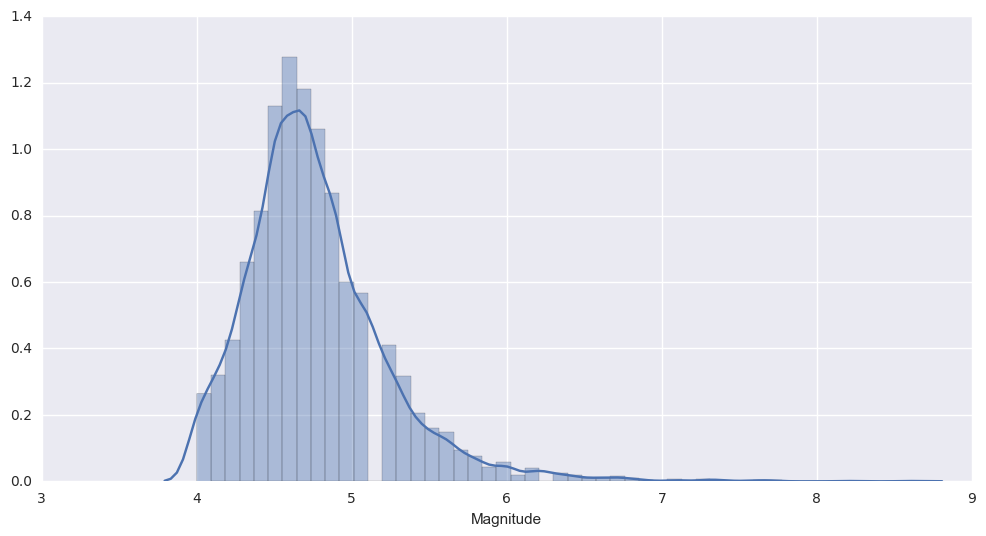

In [22]:
sns.set(rc={"figure.figsize": (12,6)})
# data to plot
x=processed_df["magnitude"]
#plot the graph
ax=sns.distplot(x,kde=True)
sns.despine()
# set the xlabel as magnitude
ax.set(xlabel="Magnitude")

Seaborn Distplot function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. The above graph shows the frequency of different magnitude earthquakes during the year 2012 all around the world with help of histogram and kde. 

### Joint Plot Using Seaborn

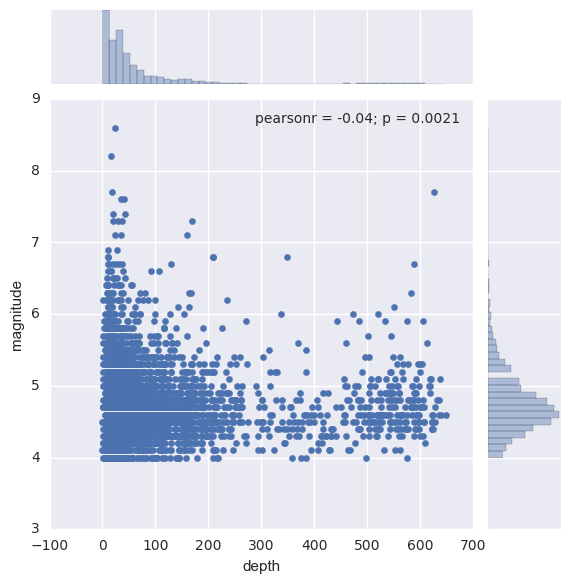

In [23]:
sns.set(rc={"figure.figsize": (6,6)})
# Plot joint plot 
sns.jointplot(x="depth",y="magnitude",data=processed_df)

The Above graph plots histogram and scatter plot in single graph. The y axis histogram is plotted on the right axis and the x axis histogram is plotted on the top axis, while the scatter plot is plotted in the center. The above graph is plotted between magnitude and depth, histogram shows the frequency of the both. It can be inferred that most of the earthquakes are concetrated from depth range 10-100 and magnitude range of 4-5.

In [24]:
# All the rows where the value of magnitude is greater than 5.4.
high_mag_data=processed_df[processed_df["magnitude"]>=5.4]
# Show the head of the dataframe. 
high_mag_data.head()

,timedate,lon,magnitude,region,lat,src,depth,eqid
489,2012-01-01 05:27:54,138.1550,6.8,"Izu Islands, Japan region",31.4160,us,348.5,c0007fbh
396,2012-01-07 07:31:44,127.4332,5.6,"Halmahera, Indonesia",1.6969,us,131.6,c0007h84
391,2012-01-07 17:24:50,145.1982,5.4,"eastern New Guinea region, Papua New Guinea",-5.1586,us,58.7,c0007hb5
388,2012-01-07 18:37:59,-175.2546,5.5,Kermadec Islands region,-28.8544,us,20.3,c0007hbr
381,2012-01-08 00:35:52,-178.5548,5.4,Fiji region,-17.8876,us,549.1,c0007hgb


### Scatter Plot Using Plotly (Markers as the function of depth and magnitude >=5.4) 

In [25]:
#The data that would be used to plot the graph, hover over text and size of markers 
depth_time_plot = [Scatter({'y': high_mag_data['magnitude'], 
               'x': high_mag_data['timedate'],
               'name': 'Earthquake Depth',
               'mode': 'markers',
               'text': high_mag_data['region'],
                # The size as the function of the depth, using the min max normalization.             
               'marker': {
                    'size':5 * 1/(30*(high_mag_data['depth'] + abs(high_mag_data['depth'].min())) / (high_mag_data['depth'].max() + abs(high_mag_data['depth'].min())
))                }})]
data_depth = Data(depth_time_plot)
#Define the layout of the graph
layout_depth = Layout(title='Magnitude VS Date of Event',
                      yaxis=YAxis(title='Magnitude of the Event'),
                      xaxis=XAxis(title='Date of Event'),
                      hovermode='closest')

fig_depth = Figure(data=data_depth, layout=layout_depth )
py.iplot(fig_depth)

The depth was normalized using the min max normalization and its inverse was used to describe the size of the marker. Since, lesser the value of depth, more dangerous the earthquake. The bigger markers in the above graph shows the earthquakes that are more dangerous due to there proximity to the earth surface and magnitude compared to the smaller ones which too have the magnitude greater than 5.4 but, the point of generation is much deeper in earth surface. 

### Map Plot Using plotly (Magnitudes>=5.4)

Mapbox API easily plots the latitude and longitude data using plotly. 


The Mapbox API does require an access token and requires you to create an account to get it.

The mapbox Access token for my profile is "pk.eyJ1Ijoic2hpdmFuc2g3IiwiYSI6ImNqMHprazZjcjAwMTQycW9ndDNpZTJjM2wifQ.JnEBVO71nlL2nErbxPI9bw" which is used to plot the graph.

In [26]:

mapbox_access_token = "pk.eyJ1Ijoic2hpdmFuc2g3IiwiYSI6ImNqMHprazZjcjAwMTQycW9ndDNpZTJjM2wifQ.JnEBVO71nlL2nErbxPI9bw"
# Latitudes of the locations where the magnitude of earthquake was greater than or equal to 5.4
site_lat = high_mag_data["lat"]
# Longitude of the locations where the magnitude of earthquake was greater than or equal to 5.4
site_lon = high_mag_data["lon"]
# The name of the locations fro each marker
locations_name = high_mag_data["region"]
#The data that would be used to plot the graph, hover over text and size of markers 
data = Data([
    Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=Marker(
            #The size as the function of the depth, using the min max normalization.     
            size=5 * 1/(30*(high_mag_data['depth'] + abs(high_mag_data['depth'].min())) / (high_mag_data['depth'].max() + abs(high_mag_data['depth'].min())
)),
            # Set the color and opacity of the markers.    
            color='rgb(0,0,255)',
            opacity=0.7
        ),
        # Label text of each marker
        text=locations_name,
        hoverinfo='text',
        showlegend=False
    )
])
# Define the layout of the Graph.
layout = Layout(
    title='Earthquakes with magnitude greater than 5.4 in year 2012',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        pitch=0,
        zoom=1,
        style='light'
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Earthquakes with magnitude greater than 5.4 in year 2012')

The depth was normalized using the min max normalization and its inverse was used to describe the size of the marker. Since, lesser the value of depth, more dangerous the earthquake. The bigger markers in the above graph shows the earthquakes that are more dangerous due to there proximity to the earth surface and magnitude compared to the smaller ones which too have the magnitude greater than 5.4 but, the point of generation is much deeper in earth surface. The above graph shows the actual location of each earthquake on the world map.

### Categorized Data Analysis


The earthquakes were categorized in 4 risk categories based on there magnitude and depth.

The first category is High risk, earthquakes with magnitude greater than 5.4 and depth less than 300 comes under this category.

The second category is Medium Risk, earthquakes with magnitude greater than 4.7 and less than 5.4 and depth less than 200 comes under this category.

The third category is Low risk, earthquakes with magnitude greater than 4 and less than 4.7 and depth less than 15 comes under this category.

The fourth category is Uncategorised, all the earthquakes that does not come in any of the four category comes in this category.  


The categorization was done on the basis of infromation provided on this site. http://www.natural-hazards.ch/home/dealing-with-natural-hazards/earthquakes/danger-levels-earthquakes.html

In [27]:
# Function to categorize the data in four categories
def func(row):
    if (row["magnitude"]>=5.4) & (row["depth"]<300):
        return 'High'
    elif (row["magnitude"]>=4.7) & (row["magnitude"]<5.4) & (row["depth"]<=200):
        return"Medium"
    elif (row["magnitude"]>=4) & (row["magnitude"]<4.7) & (row["depth"]<=150):
        return "Low"
    else:
        return "Uncategorized"
# A new row named Risk is added to the data frame using the function above.    
processed_df["risk"]=processed_df.apply(func,axis=1)
processed_df[0:10]

,timedate,lon,magnitude,region,lat,src,depth,eqid,risk
495,2012-01-01 00:30:06,143.6314,5.1,south of the Mariana Islands,11.9591,us,18.1,c0007fag,Medium
494,2012-01-01 00:50:09,166.2085,5.2,Santa Cruz Islands,-11.4036,us,77.6,c0007fac,Medium
493,2012-01-01 02:35:19,91.8052,4.6,"Tripura, India region",23.4421,us,15.2,2012vfag,Low
492,2012-01-01 02:40:36,-73.1100,4.0,northern Colombia,6.6774,us,158.1,2012vfai,Uncategorized
491,2012-01-01 04:56:41,-149.1724,5.1,Pacific-Antarctic Ridge,-58.3105,us,10.0,c0007fbc,Medium
490,2012-01-01 05:19:39,92.0148,4.6,"Andaman Islands, India region",10.7617,us,31.8,c0007fbf,Low
489,2012-01-01 05:27:54,138.1550,6.8,"Izu Islands, Japan region",31.4160,us,348.5,c0007fbh,Uncategorized
488,2012-01-01 06:11:42,158.8722,4.7,near the east coast of the Kamchatka Peninsula...,51.0000,us,43.6,c0007fc8,Medium
487,2012-01-01 07:40:27,-90.4716,4.3,offshore Guatemala,13.7650,us,71.5,c0007fcx,Low
486,2012-01-01 08:31:26,141.3609,4.5,"near the east coast of Honshu, Japan",37.8278,us,43.1,c0007fdj,Low


### Pie Chart Using Matplotlib

In [28]:
# Count the number of values in each category
pie_data=processed_df.risk.value_counts()
print (pie_data)

Medium           2512
Low              2240
Uncategorized     590
High              498
Name: risk, dtype: int64


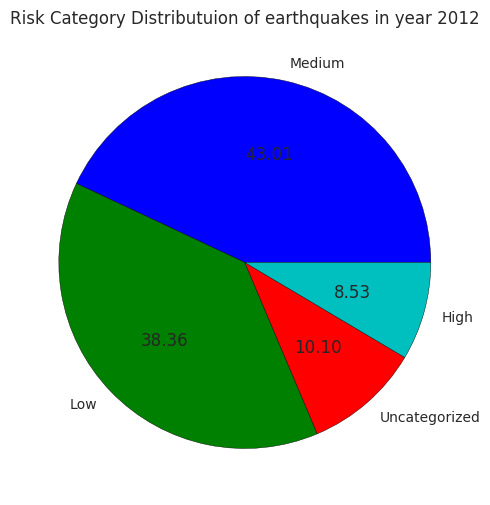

In [29]:
# Define the labels for the pie chart
labels=["Medium","Low","Uncategorized","High"]
# Plot the ppie chart with labels as defined above and wedge percentage calculated upto 2 decimal places
plt.pie(pie_data,labels=labels, autopct="%.2f")
# Set the title of the pie chart
plt.title("Risk Category Distributuion of earthquakes in year 2012")

The above pie chart shows the earthquake data categorized in 4 categories.

43.01% of earthquakes falls under Medium risk category.

38.36% of earthquakes falls under low risk category.

10.10% of earthquakes are uncategorized.

8.53% of earthquakes falls under the high risk category capable of causing large amount of destruction.

### Scatter Plot using Matplotlib

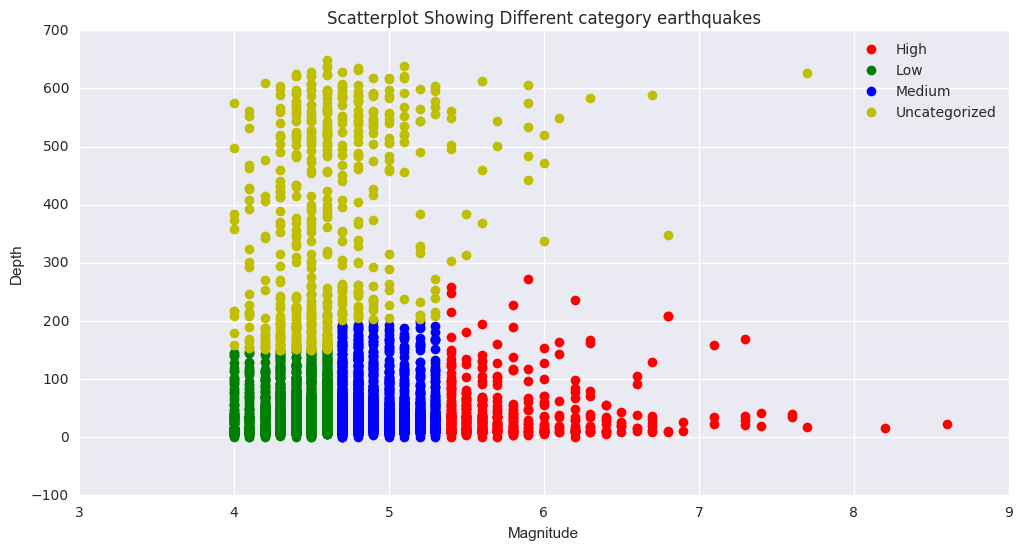

In [30]:
# A dataframe to only contain the columns magnitude, depth and risk
mag_dep = processed_df[["magnitude","depth","risk"]]
# Group the data by Risk
groups= mag_dep.groupby("risk")
# Define colours for the different categories
colors = ['r', 'g','b','y'] 
color_index = 0
plt.figure(figsize=(12,6))
# plot the graph for different categories
for group in groups:
    # Assign the Colour 
    color = colors[color_index]
    group_label = group[0]
    group_data = group[1]
    # X-axis would represent magnitude while, y-axis would represent depth
    plt.plot(group_data['magnitude'],group_data["depth"], color=color, marker='o',linestyle='' ,label=group_label)
    color_index += 1

plt.title("Scatterplot Showing Different category earthquakes")  
plt.xlabel("Magnitude")
plt.ylabel("Depth")
# Define the range of x-axis
plt.xlim([3,9])
# Define the range of y-axis
plt.ylim([-100,700])
plt.legend()
plt.show()

The above scatter plot is plot between magnitude and depth of earthquakes. It can be inferred that most of the eartquakes fall under the medium risk category.